/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


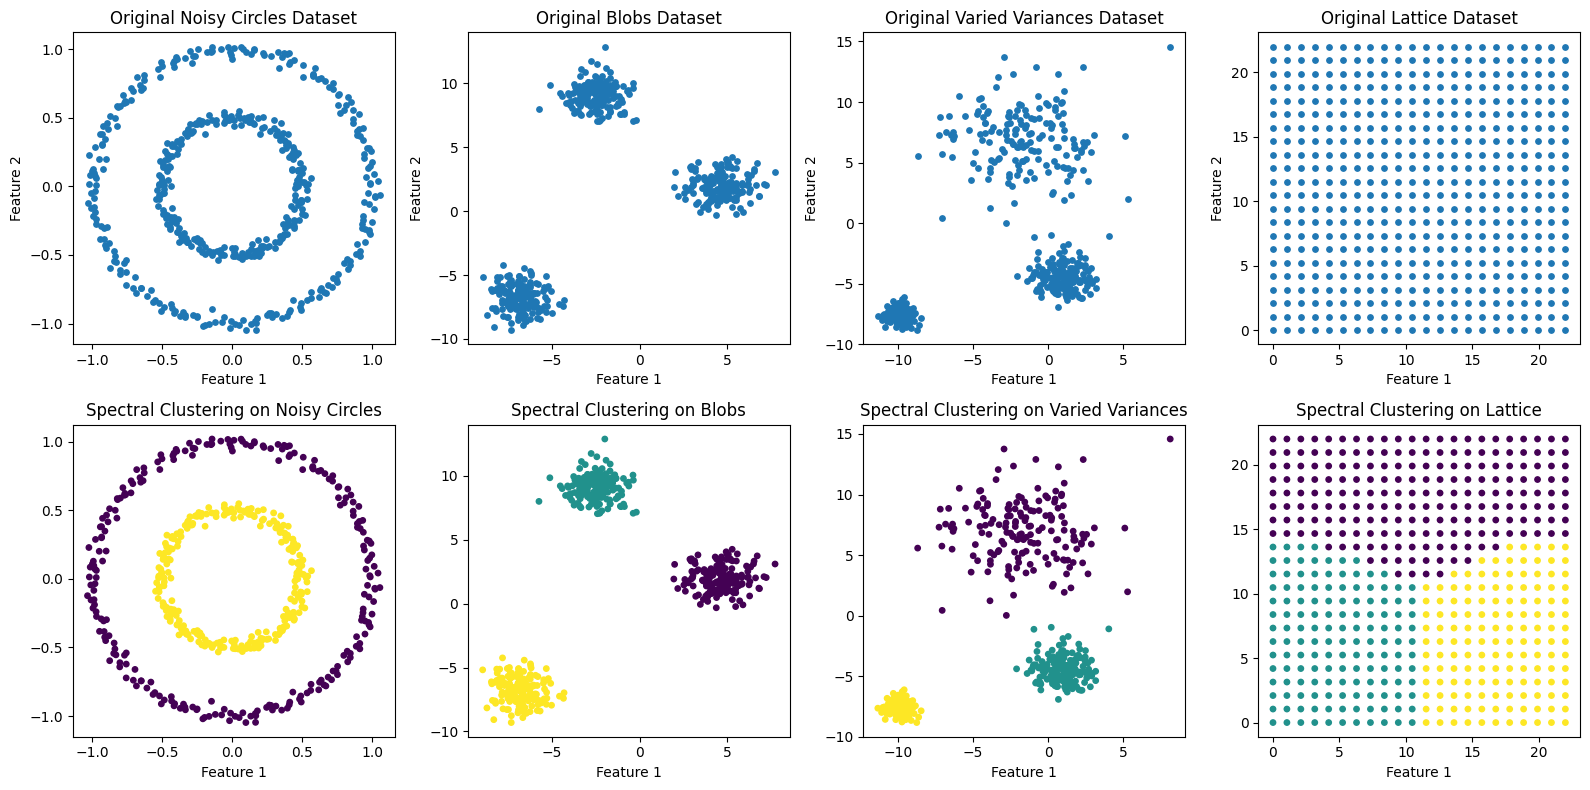

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

# Parameters
n_samples     = 500
seed_circles  = 4
seed_blobs    = 42
seed_varied   = 100
grid_size     = 22  # Number of points along one dimension of the grid
spacing       = 1.0   # Spacing between points in the grid

# Generate noisy circles dataset
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

# Generate blobs dataset
blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

# Generate varied blobs dataset (different cluster_std for each cluster)
varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

# Generate lattice dataset
x = np.linspace(0, grid_size * spacing, grid_size)
y = np.linspace(0, grid_size * spacing, grid_size)
xx, yy = np.meshgrid(x, y)
lattice_data = np.c_[xx.ravel(), yy.ravel()]  # Flatten the grid into a 2D array

# Apply BIRCH to datasets
birch_circles = Birch(n_clusters=2, threshold=0.1)
clusters_circles = birch_circles.fit_predict(noisy_circles)

birch_blobs = Birch(n_clusters=3, threshold=1.0)
clusters_blobs = birch_blobs.fit_predict(blobs)

birch_varied = Birch(n_clusters=3, threshold=1.5)
clusters_varied = birch_varied.fit_predict(varied)

birch_lattice = Birch(n_clusters=4, threshold=2.0)
clusters_lattice = birch_lattice.fit_predict(lattice_data)

# Apply Spectral Clustering to datasets
sc_circles = SpectralClustering(n_clusters=2,
                                affinity = 'nearest_neighbors',
                                gamma = 1.0,
                                random_state = 42)
clusters_circles = sc_circles.fit_predict(noisy_circles)

sc_blobs = SpectralClustering(n_clusters=3,
                                affinity = 'rbf',
                                gamma = 1.0,
                                random_state = 42)
clusters_blobs = sc_blobs.fit_predict(blobs)

sc_varied = SpectralClustering(n_clusters=3,
                                affinity = 'rbf',
                                gamma = 1.0,
                                random_state = 42)
clusters_varied = sc_varied.fit_predict(varied)

sc_lattice = SpectralClustering(n_clusters=3,
                                affinity = 'rbf',
                                gamma = 1.0,
                                random_state = 42)
clusters_lattice = sc_lattice.fit_predict(lattice_data)

# =======================================================================================================
# Create subplots dynamically
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=False)

datasets = [
    (noisy_circles, clusters_circles, "Noisy Circles"),
    (blobs, clusters_blobs, "Blobs"),
    (varied, clusters_varied, "Varied Variances"),
    (lattice_data, clusters_lattice, "Lattice"),
]

# Plot datasets and clustering results
for i, (data, clusters, title) in enumerate(datasets):
    # Plot original dataset
    axes[0, i].scatter(data[:, 0], data[:, 1], s=15)
    axes[0, i].set_title(f"Original {title} Dataset")
    axes[0, i].set_xlabel("Feature 1")
    axes[0, i].set_ylabel("Feature 2")

    # Plot BIRCH clustering results
    axes[1, i].scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=15)
    axes[1, i].set_title(f"Spectral Clustering on {title}")
    axes[1, i].set_xlabel("Feature 1")

# Remove any empty subplots if necessary
for j in range(len(datasets), axes.shape[0]):
    for k in range(2):
        fig.delaxes(axes[k, j])

# Adjust layout and show plots
plt.tight_layout()
plt.savefig("bruh1.png")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


WCSS Results:
Noisy Circles: 312.22
Blobs: 955.65
Varied Variances: 2782.26

Accuracy Results:
Noisy Circles: 1.00
Blobs: 1.00
Varied Variances: 1.00


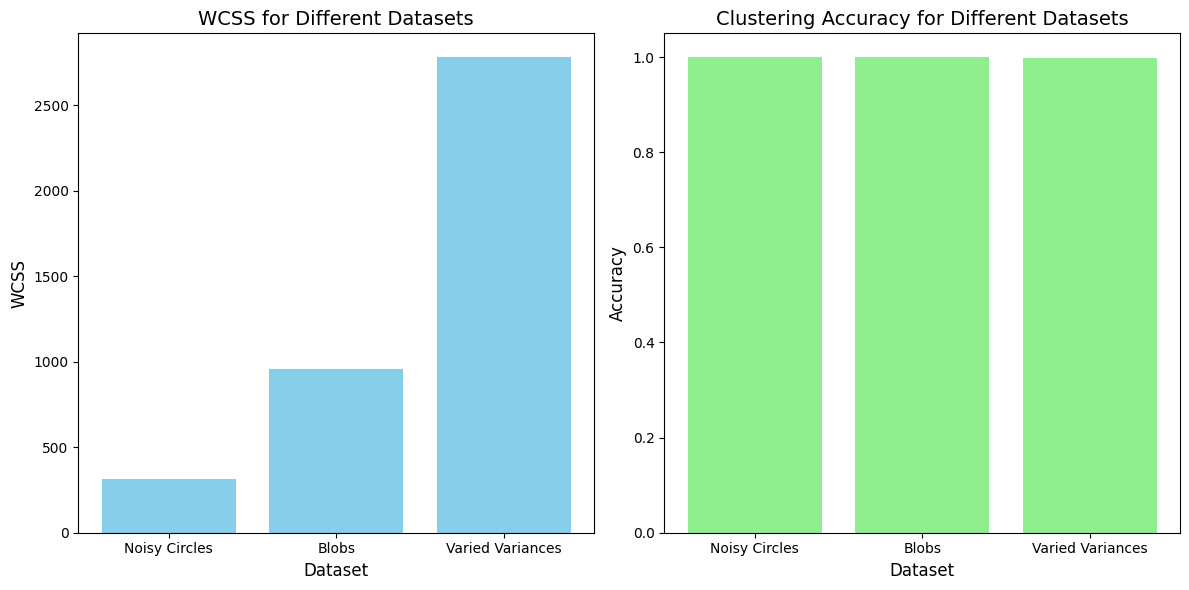

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles", 2, 0.1),
    (blobs, labels_blobs, "Blobs", 3, 1.0),
    (varied, labels_varied, "Varied Variances", 3, 1.5),
]

# Functions to calculate WCSS and accuracy
def calculate_wcss(data, labels):
    """Calculate Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for cluster in np.unique(labels):
      cluster_points = data[labels == cluster, :]
      centroid = cluster_points.mean(axis=0)
      wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

def calculate_accuracy(true_labels, predicted_labels):
    """Calculate clustering accuracy using the Hungarian algorithm."""
    unique_true = np.unique(true_labels)
    unique_pred = np.unique(predicted_labels)
    cost_matrix = np.zeros((len(unique_true), len(unique_pred)))
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            cost_matrix[i, j] = -np.sum((true_labels == true_label) & (predicted_labels == pred_label))
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    return -cost_matrix[row_ind, col_ind].sum() / len(true_labels)

# Initialize lists to store WCSS and accuracy
wcss_list = []
accuracy_list = []

# Apply BIRCH clustering and compute WCSS and accuracy
for data, true_labels, name, n_clusters, threshold in datasets:

    sc = SpectralClustering(n_clusters=n_clusters,
                            affinity = 'nearest_neighbors',
                            gamma = 1.0,
                            random_state = 42)
    predicted_labels = sc.fit_predict(data)

    # Calculate WCSS
    wcss = calculate_wcss(data, predicted_labels)
    wcss_list.append((name, wcss))

    # Calculate accuracy
    accuracy = calculate_accuracy(true_labels, predicted_labels)
    accuracy_list.append((name, accuracy))

# Print WCSS and accuracy results
print("WCSS Results:")
for name, wcss in wcss_list:
    print(f"{name}: {wcss:.2f}")

print("\nAccuracy Results:")
for name, accuracy in accuracy_list:
    print(f"{name}: {accuracy:.2f}")

# Plot WCSS and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot WCSS
datasets_names = [name for name, _ in wcss_list]
wcss_values = [wcss for _, wcss in wcss_list]
axes[0].bar(datasets_names, wcss_values, color='skyblue')
axes[0].set_title("WCSS for Different Datasets", fontsize=14)
axes[0].set_ylabel("WCSS", fontsize=12)
axes[0].set_xlabel("Dataset", fontsize=12)

# Plot Accuracy
accuracy_values = [accuracy for _, accuracy in accuracy_list]
axes[1].bar(datasets_names, accuracy_values, color='lightgreen')
axes[1].set_title("Clustering Accuracy for Different Datasets", fontsize=14)
axes[1].set_ylabel("Accuracy", fontsize=12)
axes[1].set_xlabel("Dataset", fontsize=12)

plt.tight_layout()
plt.savefig("bruh2.png")
plt.show()


## Bank Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/bank_transactions_data_2.csv'
data = pd.read_csv(file_path)

# Inspect the data structure
print(data.head())

# Select relevant features for clustering
features = data[['TransactionAmount', 'CustomerAge']]

# Ensure no missing values in the selected features
features = features.dropna()

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

WCSS for Spectral Clustering: 1981.81


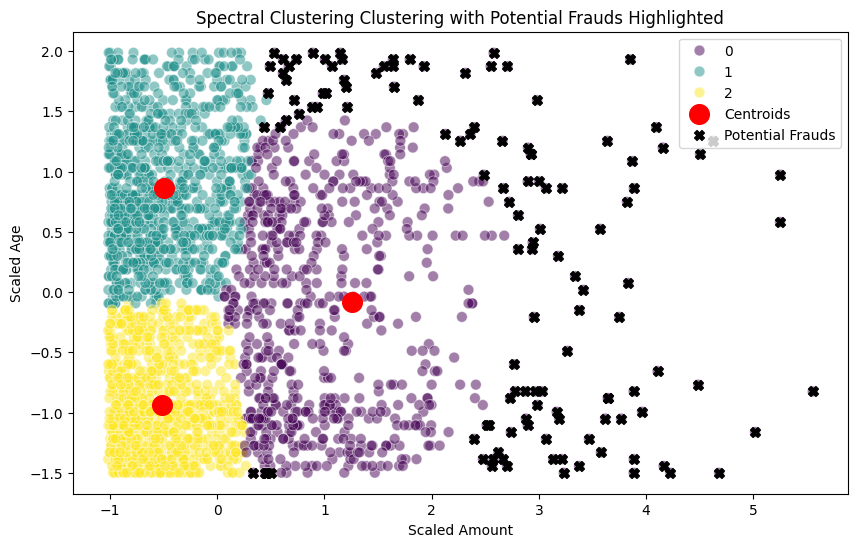

Number of potential frauds detected: 126
Silhouette Score: 0.42
Calinski-Harabasz Index: 1925.74
Davies-Bouldin Index: 0.90


In [ ]:
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features
X = data[['TransactionAmount', 'CustomerAge']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SpectralClustering clustering with 3 clusters
sc = SpectralClustering(n_clusters=3,
                        affinity = 'nearest_neighbors',
                        gamma = 1.0,
                        random_state = 42)
sc_labels = sc.fit_predict(X_scaled)

# Add labels to the dataset
data['SC_Cluster'] = sc_labels

# Calculate distance of each point to its assigned cluster centroid
centroids = np.array([X_scaled[sc_labels == i].mean(axis=0) for i in np.unique(sc_labels)])
distances = np.linalg.norm(X_scaled - centroids[sc_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)

# Flag points above the threshold as potential frauds
data['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = data[data['Potential_Fraud']]
non_frauds = data[~data['Potential_Fraud']]

# Calculate WCSS
def calculate_wcss(data, labels, centroids):
    wcss = 0
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        centroid = centroids[cluster_id]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

wcss = calculate_wcss(X_scaled, sc_labels, centroids)
print(f"WCSS for Spectral Clustering: {wcss:.2f}")

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=sc_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1],
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('Spectral Clustering Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.savefig("bruh3.png")
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, sc_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, sc_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, sc_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


In [ ]:
print("data.shape = ", data.shape)
print("wcss = ", wcss)
print("wcss/num = ", wcss/data.shape[0])

data.shape =  (2512, 18)
wcss =  1981.8055581153974
wcss/num =  0.7889353336446646


In [ ]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, sc_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, sc_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, sc_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


Silhouette Score: 0.42
Calinski-Harabasz Index: 1925.74
Davies-Bouldin Index: 0.90


## Expedia

WCSS for Spectral Clustering: 19161.61
Num-elements in class 0:  552
Num-elements in class 1:  928
Num-elements in class 2:  1985


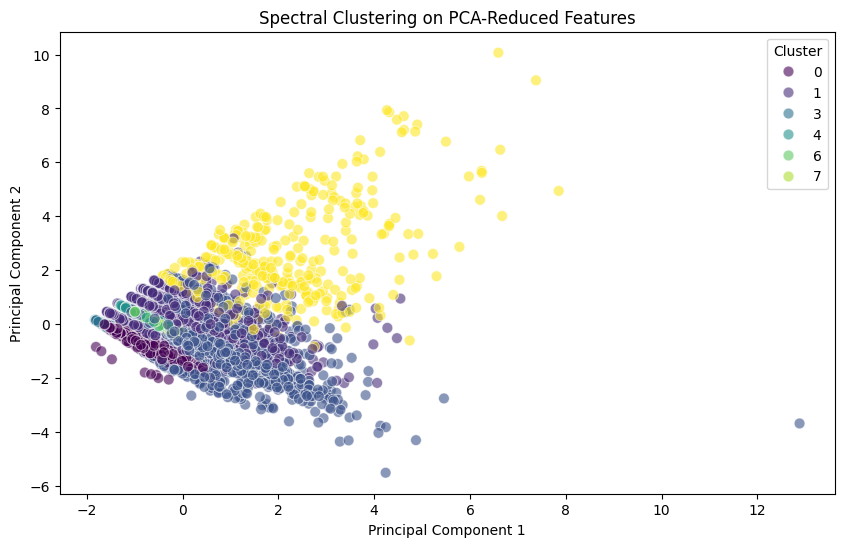

Silhouette Score: -0.03
Calinski-Harabasz Index: 389.79
Davies-Bouldin Index: 1.66


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load the dataset
file_path = '/content/travel.csv'
data = pd.read_csv(file_path)

# Feature engineering: Calculate 'travel_duration' and 'days_in_advance'
data['srch_ci'] = pd.to_datetime(data['srch_ci'])
data['srch_co'] = pd.to_datetime(data['srch_co'])
data['date_time'] = pd.to_datetime(data['date_time'])

data['travel_duration'] = (data['srch_co'] - data['srch_ci']).dt.days
data['days_in_advance'] = (data['srch_ci'] - data['date_time']).dt.days

# Select relevant features
features = [
    'travel_duration',
    'days_in_advance',
    'orig_destination_distance',
    'srch_adults_cnt',
    'srch_children_cnt',
    'srch_rm_cnt'
]

# Trim the DataFrame to 1000 rows
num_datapoints = min(8000, data.shape[0])
data = data.sample(n=num_datapoints, random_state=42)  # Randomly sample 1000 rows

X = data[features]

# Drop rows with missing values
X = X.dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sc = SpectralClustering(n_clusters    = 9,
                        affinity      = 'nearest_neighbors')

sc_labels = sc.fit_predict(X_scaled)

# Add labels to the dataset
data = data.loc[X.index]  # Keep rows corresponding to valid features
data['SC_Cluster'] = sc_labels

# Calculate WCSS
def calculate_wcss(data, labels):
    centroids = np.array([data[labels == i].mean(axis=0) for i in np.unique(labels)])
    wcss = sum(np.sum((data[labels == i] - centroids[i]) ** 2) for i in np.unique(labels))
    return wcss

wcss = calculate_wcss(X_scaled, sc_labels)
print(f"WCSS for Spectral Clustering: {wcss:.2f}")

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Num-elements in class 0: ", np.sum(sc_labels == 0))
print("Num-elements in class 1: ", np.sum(sc_labels == 1))
print("Num-elements in class 2: ", np.sum(sc_labels == 2))


# Plot the clusters along the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=sc_labels, palette='viridis', s=60, alpha=0.6
)
plt.title('Spectral Clustering on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig("expedia_clustering.png")
plt.show()

# Calculate Silhouette Score
print("="*100)
silhouette_avg = silhouette_score(X_scaled, sc_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, sc_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, sc_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

In [ ]:
print("wcss = ", wcss)
print("wcss/num = ", wcss/X_pca.shape[0])

wcss =  19173.260553963235
wcss/num =  3.7331114785753963


In [ ]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, sc_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, sc_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, sc_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

Silhouette Score: -0.03
Calinski-Harabasz Index: 389.16
Davies-Bouldin Index: 1.67
